# Análisis Exploratorio de Datos (EDA)

In [ ]:
# 1. Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Carga de datos
def load_data():
    # Cargamos los datos
    df = pd.read_csv('../data/teleCust1000t.csv')
    print("Dimensiones del dataset:", df.shape)
    return df

df = load_data()

Dimensiones del dataset: (1000, 12)


In [7]:
# Análisis inicial y exploración básica
def initial_exploration(df):
    print("\n=== Información básica del dataset ===")
    print(df.info())
    
    print("\n=== Primeras 5 filas ===")
    print(df.head())
    
    print("\n=== Estadísticas descriptivas ===")
    print(df.describe())
    
    print("\n=== Valores únicos por columna ===")
    for col in df.columns:
        print(f"{col}: {df[col].unique()}")
    
    print("\n=== Valores nulos ===")
    print(df.isnull().sum())

initial_exploration(df)


=== Información básica del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None

=== Primeras 5 filas ===
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   

Análisis de valores atípicos (outliers)

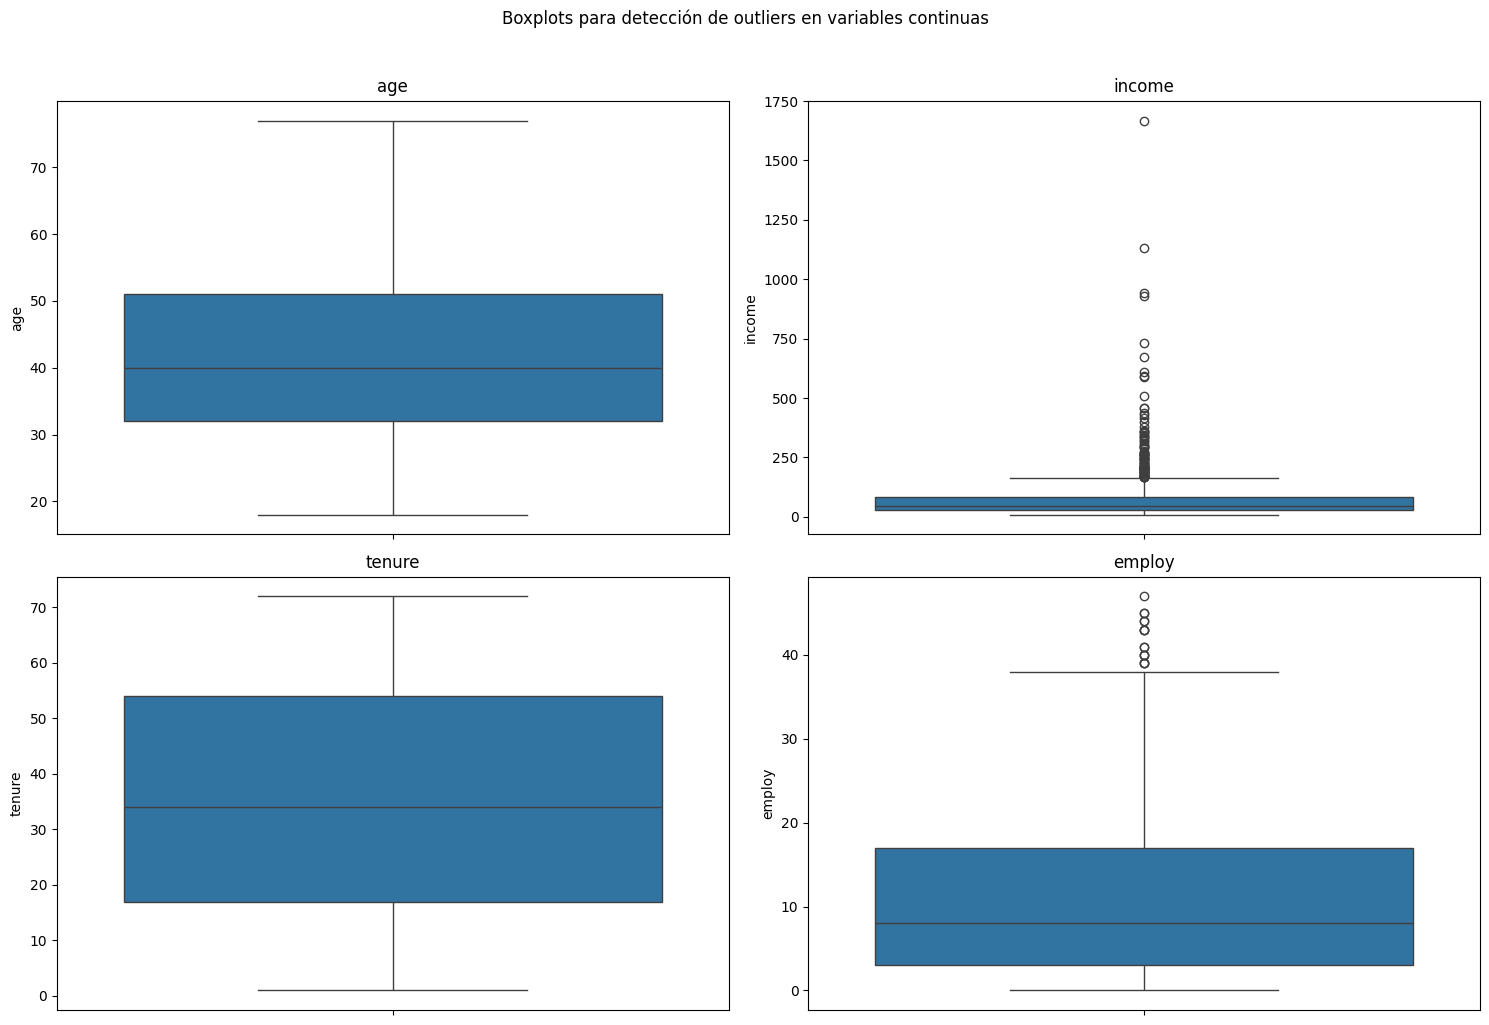


=== Número de outliers por variable continua ===
age: 0 outliers
income: 93 outliers
tenure: 0 outliers
employ: 16 outliers


In [8]:

def detect_outliers(df):
    plt.figure(figsize=(15, 10))
    plt.suptitle("Boxplots para detección de outliers en variables continuas", y=1.02)
    
    # Seleccionamos solo las variables continuas
    continuous_cols = ['age', 'income', 'tenure', 'employ']
    
    for i, column in enumerate(continuous_cols, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(y=df[column])
        plt.title(column)
    
    plt.tight_layout()
    plt.show()
    
    # Calculamos los outliers usando el método IQR
    outliers_dict = {}
    for column in continuous_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_dict[column] = len(outliers)
    
    print("\n=== Número de outliers por variable continua ===")
    for col, count in outliers_dict.items():
        print(f"{col}: {count} outliers")
    
    return outliers_dict

outliers = detect_outliers(df)

Análisis de distribuciones

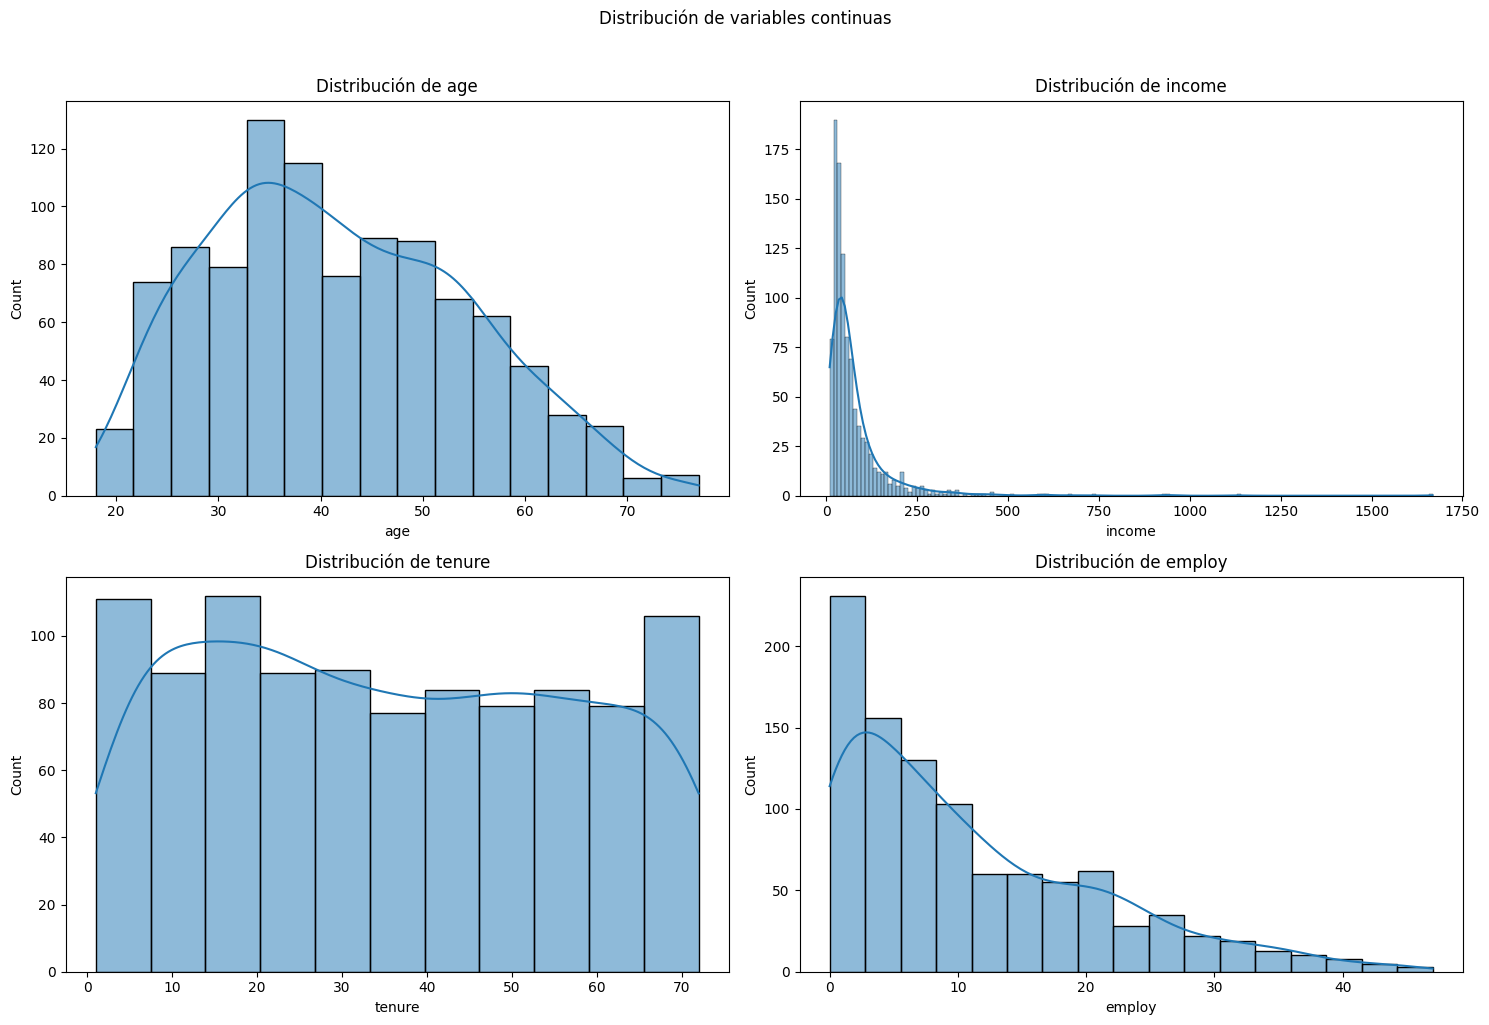


=== Test de Normalidad (Shapiro-Wilk) ===
age: p-value = 0.0000
income: p-value = 0.0000
tenure: p-value = 0.0000
employ: p-value = 0.0000


In [9]:
def analyze_distributions(df):
    # Variables continuas
    continuous_cols = ['age', 'income', 'tenure', 'employ']
    
    plt.figure(figsize=(15, 10))
    plt.suptitle("Distribución de variables continuas", y=1.02)
    
    for i, column in enumerate(continuous_cols, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribución de {column}')
    
    plt.tight_layout()
    plt.show()
    
    # Test de normalidad para variables continuas
    print("\n=== Test de Normalidad (Shapiro-Wilk) ===")
    for column in continuous_cols:
        stat, p_value = stats.shapiro(df[column])
        print(f"{column}: p-value = {p_value:.4f}")

analyze_distributions(df)

Análisis de variables discretas

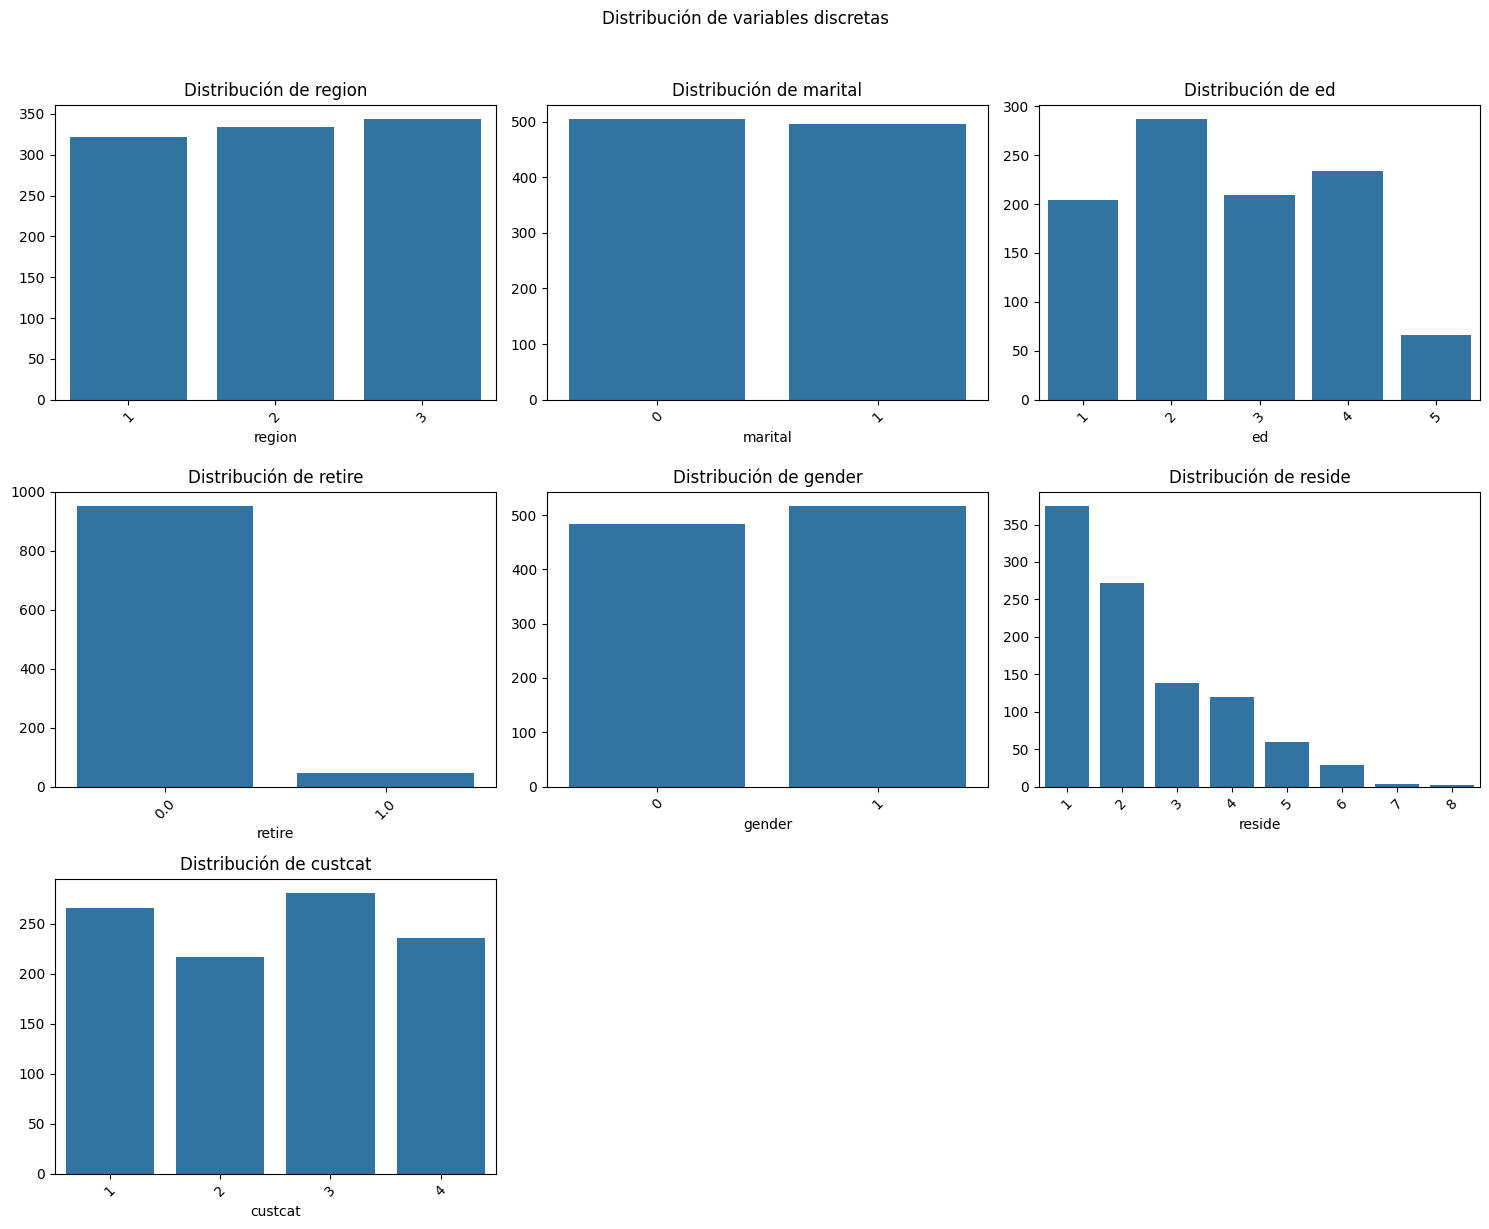


=== Análisis de variables discretas vs custcat ===

Tabla de contingencia para region:
custcat   1   2   3   4
region                 
1        75  78  95  74
2        92  69  92  81
3        99  70  94  81
Chi-square test p-value: 0.6901

Tabla de contingencia para marital:
custcat    1    2    3    4
marital                    
0        155  102  142  106
1        111  115  139  130
Chi-square test p-value: 0.0152

Tabla de contingencia para ed:
custcat   1   2   3   4
ed                     
1        75  29  91   9
2        83  54  98  52
3        53  53  54  49
4        46  59  34  95
5         9  22   4  31
Chi-square test p-value: 0.0000

Tabla de contingencia para retire:
custcat    1    2    3    4
retire                     
0.0      255  210  259  229
1.0       11    7   22    7
Chi-square test p-value: 0.0297

Tabla de contingencia para gender:
custcat    1    2    3    4
gender                     
0        131   98  139  115
1        135  119  142  121
Chi-square test p-v

In [10]:
def discrete_analysis(df):
    discrete_cols = ['region', 'marital', 'ed', 'retire', 'gender', 'reside', 'custcat']
    
    fig = plt.figure(figsize=(15, 12))
    plt.suptitle("Distribución de variables discretas", y=1.02)
    
    for i, column in enumerate(discrete_cols, 1):
        plt.subplot(3, 3, i)
        value_counts = df[column].value_counts().sort_index()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribución de {column}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis bivariado con la variable objetivo (custcat)
    print("\n=== Análisis de variables discretas vs custcat ===")
    for col in discrete_cols[:-1]:  # Excluimos custcat
        print(f"\nTabla de contingencia para {col}:")
        print(pd.crosstab(df[col], df['custcat']))
        
        # Chi-square test de independencia
        chi2, p_value = stats.chi2_contingency(pd.crosstab(df[col], df['custcat']))[:2]
        print(f"Chi-square test p-value: {p_value:.4f}")

discrete_analysis(df)

Análisis de correlaciones

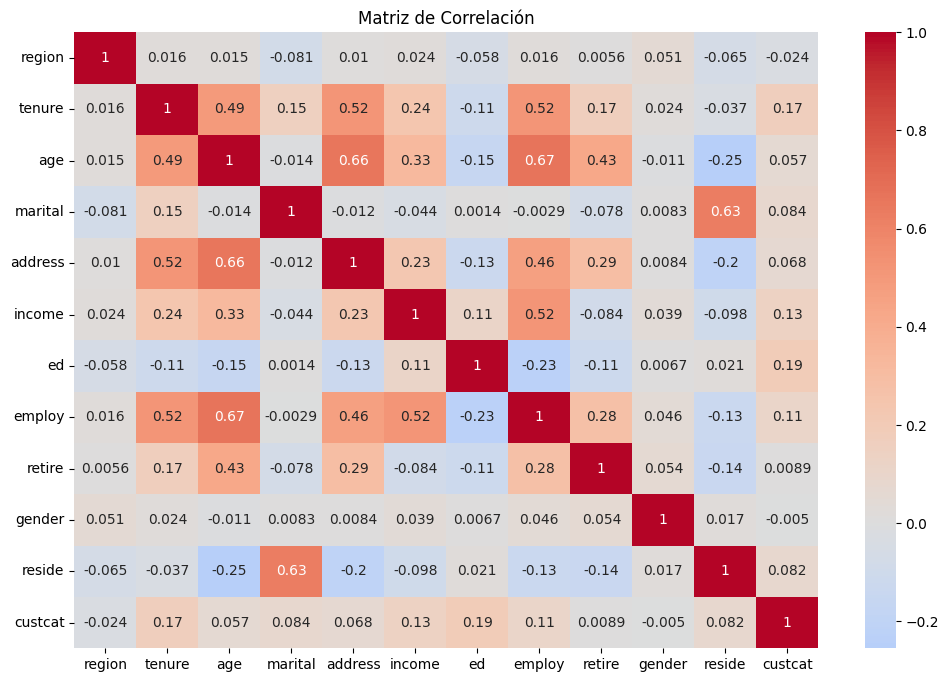


=== Correlaciones más fuertes (|corr| > 0.5) ===
address - tenure: 0.523
address - age: 0.660
employ - tenure: 0.520
employ - age: 0.670
employ - income: 0.516
reside - marital: 0.626


In [11]:
def correlation_analysis(df):
    # Matriz de correlación
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación')
    plt.show()
    
    # Identificar correlaciones fuertes
    print("\n=== Correlaciones más fuertes (|corr| > 0.5) ===")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                print(f"{correlation_matrix.index[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

correlation_analysis(df)

Feature Engineering y Preprocesamiento

In [12]:
def preprocess_data(df):
    # Crear copia del dataframe original
    df_processed = df.copy()
    
    # 1. Feature engineering
    # Ratio income/employ (ingreso por año de empleo)
    df_processed['income_per_year_employed'] = df_processed['income'] / (df_processed['employ'] + 1)
    
    # Categorización de edad
    df_processed['age_category'] = pd.cut(df_processed['age'], 
                                        bins=[0, 30, 50, 70, 100],
                                        labels=['Young', 'Middle', 'Senior', 'Elderly'])
    
    # Ratio income/edad (ingreso relativo a la edad)
    df_processed['income_age_ratio'] = df_processed['income'] / df_processed['age']
    
    # 2. Normalización de variables continuas
    scaler = StandardScaler()
    continuous_cols = ['age', 'income', 'employ', 'tenure']
    df_processed[continuous_cols] = scaler.fit_transform(df_processed[continuous_cols])
    
    return df_processed

df_processed = preprocess_data(df)

# Mostrar las primeras filas del dataset procesado
print("\n=== Primeras filas del dataset procesado ===")
print(df_processed.head())



=== Primeras filas del dataset procesado ===
   region    tenure       age  marital  address    income  ed    employ  \
0       2 -1.055125  0.184505        1        9 -0.126506   4 -0.594123   
1       3 -1.148806 -0.691812        1        7  0.546450   5 -0.594123   
2       3  1.521092  0.821826        1       24  0.359517   1  1.787528   
3       2 -0.118319 -0.691812        0       12 -0.416251   2 -1.090300   
4       2 -0.586722 -0.930808        1        9 -0.444291   1 -0.891829   

   retire  gender  reside  custcat  income_per_year_employed age_category  \
0     0.0       0       2        1                 10.666667       Middle   
1     0.0       0       6        4                 22.666667       Middle   
2     0.0       1       2        3                  3.866667       Senior   
3     0.0       1       1        1                 33.000000       Middle   
4     0.0       0       4        3                 10.000000        Young   

   income_age_ratio  
0          1.45454

In [13]:

# 9. Resumen final y recomendaciones
def print_summary():
    print("\n=== RESUMEN DEL ANÁLISIS Y RECOMENDACIONES ===")
    print("""
    1. Calidad de los datos:
       - No se encontraron valores nulos en el dataset
       - Se identificaron outliers principalmente en las variables income y employ
       - Todas las variables discretas ya están codificadas numéricamente
    
    2. Distribución de variables:
       - Las variables continuas no siguen una distribución normal
       - Algunas variables discretas muestran desbalance en sus categorías
    
    3. Correlaciones y relaciones:
       - Se encontraron correlaciones significativas entre algunas variables
       - Las variables discretas muestran dependencia estadística con la variable objetivo
    
    4. Preprocesamiento realizado:
       - Normalización de variables continuas
       - Creación de nuevas características:
         * income_per_year_employed
         * age_category
         * income_age_ratio
    
    Recomendaciones para el modelado:
    1. Considerar técnicas de tratamiento de outliers para las variables continuas
    2. Evaluar técnicas de balanceo para las categorías menos representadas
    3. Usar validación cruzada estratificada debido a la distribución desigual de las clases
    4. Considerar el uso de modelos no paramétricos debido a la no normalidad de las variables
    5. Evaluar la importancia de las nuevas características creadas en el modelado
    """)

print_summary()


=== RESUMEN DEL ANÁLISIS Y RECOMENDACIONES ===

    1. Calidad de los datos:
       - No se encontraron valores nulos en el dataset
       - Se identificaron outliers principalmente en las variables income y employ
       - Todas las variables discretas ya están codificadas numéricamente
    
    2. Distribución de variables:
       - Las variables continuas no siguen una distribución normal
       - Algunas variables discretas muestran desbalance en sus categorías
    
    3. Correlaciones y relaciones:
       - Se encontraron correlaciones significativas entre algunas variables
       - Las variables discretas muestran dependencia estadística con la variable objetivo
    
    4. Preprocesamiento realizado:
       - Normalización de variables continuas
       - Creación de nuevas características:
         * income_per_year_employed
         * age_category
         * income_age_ratio
    
    Recomendaciones para el modelado:
    1. Considerar técnicas de tratamiento de outliers para 